# FLIP (00): Data Science 
**(Module 01: Data Science)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2022 [TULIP Lab](http://www.tulip.org.au), Australia

---

## Session 5 Scikit Learn Random Forest

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()


## Random Forest Classifier

Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification:

*Notice：*

In [4]:
%svn checkout https://github.com/jakevdp/sklearn_pycon2015/trunk/notebooks/fig_code

UsageError: Line magic function `%svn` not found.


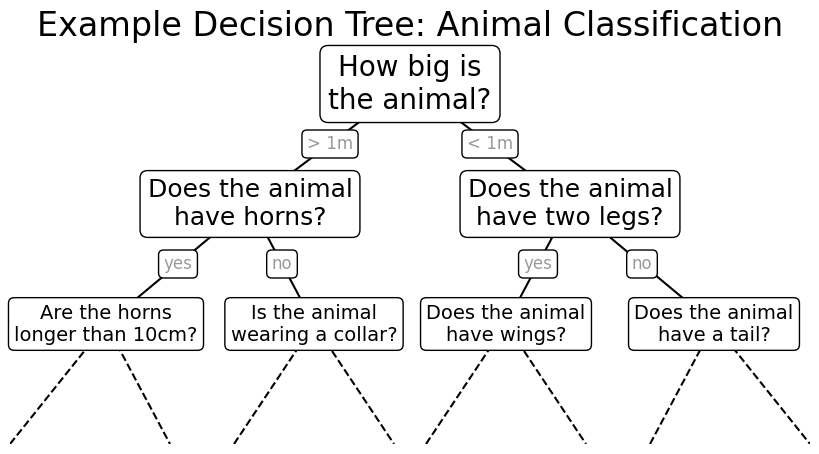

In [1]:
#If you encounter such an error ： No module named 'fig_code'
#Download the fig_code module from GitHub by typing the following command in the terminal:
#svn checkout https://github.com/jakevdp/sklearn_pycon2015/trunk/notebooks/fig_code
#A folder named'fig_code' will appear in your home directory
#Move'fig_code' to the folder where the script is located
#from sklearn.datasets import make_blobs
import fig_code     
fig_code.plot_example_decision_tree()

The binary splitting makes this extremely efficient.
As always, though, the trick is to *ask the right questions*.
This is where the algorithmic process comes in: in training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information.

### Creating a Decision Tree

Here's an example of a decision tree classifier in scikit-learn. We'll start by defining some two-dimensional labeled data:

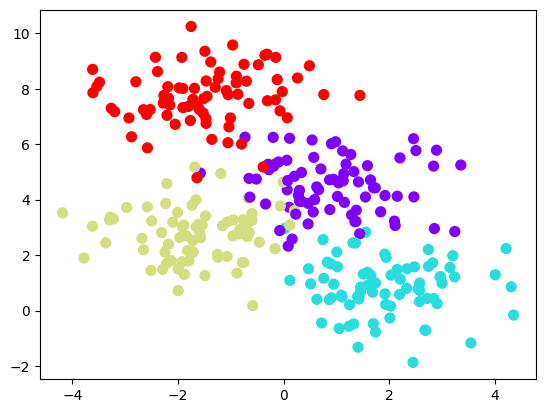

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');


In [3]:
# We have some convenience functions in the repository that help 

#从这里找到 'widgets'，https://github.com/twz915/DjangoUeditor3/tree/master/DjangoUeditor

from fig_code import visualize_tree, plot_tree_interactive

# Now using IPython's ``interact`` (available in IPython 2.0+, and requires a live kernel) we can view the decision tree splits:
plot_tree_interactive(X, y);

ModuleNotFoundError: No module named 'IPython.html'

Notice that at each increase in depth, every node is split in two **except** those nodes which contain only a single class.
The result is a very fast **non-parametric** classification, and can be extremely useful in practice.

**Question: Do you see any problems with this?**

### Decision Trees and over-fitting

One issue with decision trees is that it is very easy to create trees which **over-fit** the data. That is, they are flexible enough that they can learn the structure of the noise in the data rather than the signal! For example, take a look at two trees built on two subsets of this dataset:

<Figure size 640x480 with 0 Axes>

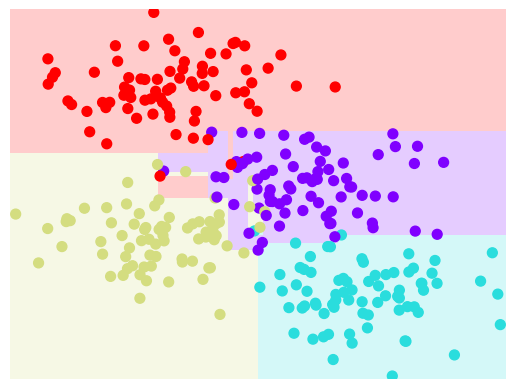

<Figure size 640x480 with 0 Axes>

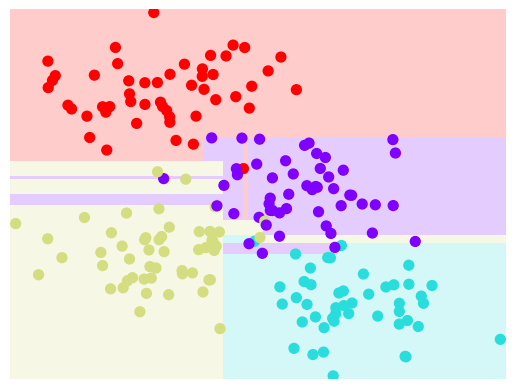

<Figure size 640x480 with 0 Axes>

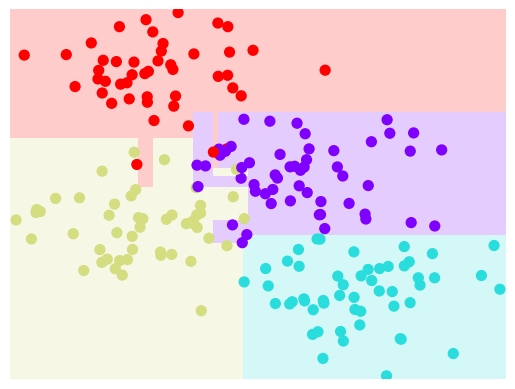

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
plt.figure()
visualize_tree(clf, X, y, boundaries=False)
plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

The details of the classifications are completely different! That is an indication of **over-fitting**: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

## Ensembles of Estimators: Random Forests

One possible way to address over-fitting is to use an **Ensemble Method**: this is a meta-estimator which essentially averages the results of many individual estimators which over-fit the data. Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up!

One of the most common ensemble methods is the **Random Forest**, in which the ensemble is made up of many decision trees which are in some way perturbed.

There are volumes of theory and precedent about how to randomize these trees, but as an example, let's imagine an ensemble of estimators fit on subsets of the data. We can get an idea of what these might look like as follows:

In [6]:
%pip install iPython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [16]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

ImportError: cannot import name 'interact' from 'IPython' (C:\Users\chuqi\AppData\Roaming\Python\Python39\site-packages\IPython\__init__.py)

See how the details of the model change as a function of the sample, while the larger characteristics remain the same!
The random forest classifier will do something similar to this, but use a combined version of all these trees to arrive at a final answer:

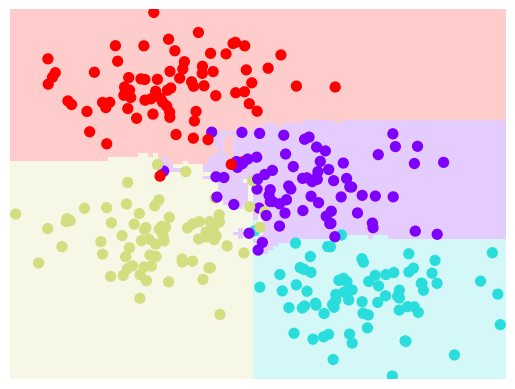

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
visualize_tree(clf, X, y, boundaries=False);

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

*(Note: above we randomized the model through sub-sampling... Random Forests use more sophisticated means of randomization, which you can read about in, e.g. the [scikit-learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest)*)

Not good for random forest:
lots of 0, few 1
structured data like images, neural network might be better
small data, might overfit
high dimensional data, linear model might work better

## Random Forest Regressor

Above we were considering random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is ``sklearn.ensemble.RandomForestRegressor``.

Let's quickly demonstrate how this can be used:

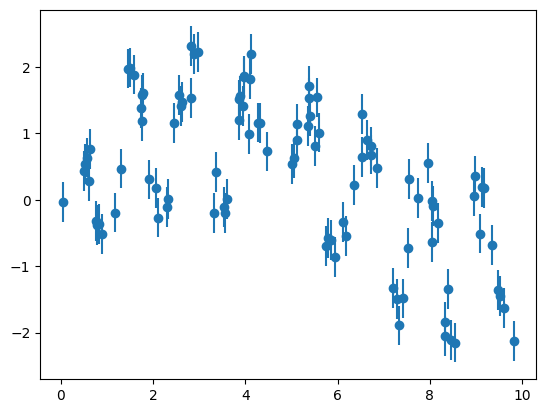

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

In [21]:
x

array([9.60399464, 0.78775878, 5.12108617, 7.52207043, 1.57757638,
       3.59871045, 8.33232571, 3.86130058, 8.96931587, 7.94995472,
       6.63591968, 2.11476534, 1.72784129, 8.18058052, 9.18279132,
       0.51036195, 1.90298579, 8.3917977 , 4.10194693, 0.51961513,
       3.94362062, 0.04075241, 3.54893292, 3.88836254, 4.28076255,
       8.05338107, 5.01702682, 5.55995229, 5.41021428, 9.81657033,
       6.17779545, 9.35219568, 6.52183282, 2.31054692, 6.52684388,
       8.32576814, 2.59723522, 8.53628281, 2.44267175, 4.46353567,
       5.599236  , 8.94657406, 6.12338463, 6.717208  , 0.60137563,
       8.45522342, 7.73807979, 5.78099537, 0.62662036, 1.1785014 ,
       0.89611985, 3.87217732, 8.03673812, 9.08057534, 8.05758004,
       5.93516632, 2.31568947, 7.55391826, 1.77684306, 2.81429103,
       5.05732983, 9.47421474, 4.13146411, 3.32003139, 5.37049069,
       1.75900476, 3.54501   , 6.72359056, 0.56731368, 9.12348205,
       3.95993909, 7.28874941, 7.33361282, 4.08126543, 5.75117

In [27]:
y

array([-1.63270935, -0.38481628,  1.14915684, -0.72910035,  1.8881066 ,
        0.01615975, -2.05313739,  1.19801762,  0.35443738,  0.55277727,
        0.90397331, -0.26689914,  1.37889926, -0.35178313,  0.17462156,
        0.43372559,  0.30704161, -1.34436705,  1.82584738,  0.53876736,
        1.41949061, -0.0338772 , -0.19965479,  1.56266871,  1.16529786,
       -0.63534313,  0.53813   ,  1.54368716,  1.26430687, -2.13204565,
       -0.54724231, -0.67651955,  0.64254001, -0.10856122,  1.29542707,
       -1.84568484,  1.41732624, -2.150827  ,  1.1624942 ,  0.72959292,
        1.01382197,  0.06023984, -0.33383924,  0.80484682,  0.28012794,
       -2.11260857,  0.03369608, -0.56988437,  0.7722396 , -0.19192507,
       -0.50905754,  1.51342977, -0.02084019, -0.50846926, -0.09433658,
       -0.866169  ,  0.01382458,  0.31170031,  1.60837698,  1.52979206,
        0.62959272, -1.35528501,  2.19300753, -0.1976285 ,  1.53773828,
        1.58144368, -0.10679469,  0.68330351,  0.63772295,  0.19

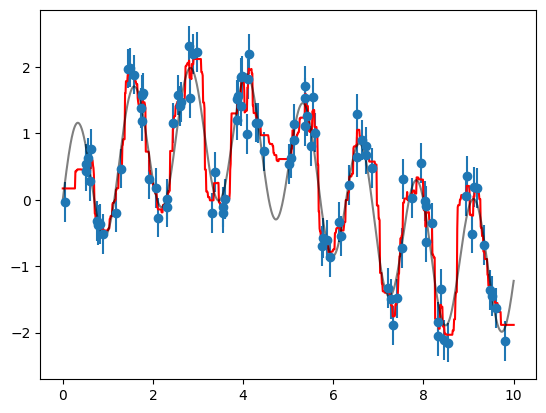

In [19]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

Tradeoff between simplicity and thinking about what your data is.

Feature engineering is important, need to know your domain: Fourier transform frequency distribution.

## Random Forest Limitations

The following data scenarios are not well suited for random forests:
* y: lots of 0, few 1
* Structured data like images where a neural network might be better
* Small data size which might lead to overfitting
* High dimensional data where a linear model might work better